In [3]:
from pandas_datareader import data
from pandas_datareader._utils import RemoteDataError
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import csv
import re
from datetime import datetime

import os.path
from os import path
import time

In [4]:
fontsize_reg = 12
fontsize_title = 16
from pylab import rcParams
rcParams['figure.facecolor'] = '1'
rcParams['figure.figsize'] = [8.0, 3.5]
rcParams['figure.dpi'] = 80
rcParams['savefig.dpi'] = 600

rcParams['font.size'] = 12
rcParams['legend.fontsize'] = 'large'
rcParams['figure.titlesize'] = 'large'

In [5]:
# Зададим path для папки проекта и для папок файлов
path_project_folder = 'C:/DAN/t_systems/trade_project/'
path_prices_timeseries_folder = 'C:/DAN/t_systems/trade_project/price_timeseries/'
path_merged_news_and_prices_folder = 'C:/DAN/t_systems/trade_project/merged_news_and_prices/'
folder_name_headlines = 'backup_headlines/'
folder_name_logger = 'logger/'

In [384]:
# To read random data
# prices_news_merged_df = pd.read_csv('prices_news_merged_df.csv', sep=';')

# To read real data
# GOOGL.OQ, VOWG_p.DE
prices_news_merged_df = pd.read_csv(path_merged_news_and_prices_folder + 'merged_news_and_prices_daily_adjusted_GOOGL.OQ.csv', sep=',')

In [385]:
list_of_files_to_merge = os.listdir(path_merged_news_and_prices_folder)
# print(list_of_files_to_merge)

all_stock_prices = pd.DataFrame(
    data = [], 
    columns=[])

for file_now in list_of_files_to_merge:
    file_path = path_merged_news_and_prices_folder + file_now
    timeseries_df = pd.read_csv(file_path, sep=',')
    print(file_path, timeseries_df.shape)
    
    all_stock_prices = pd.concat([all_stock_prices, timeseries_df], ignore_index=True)
    time.sleep(0)

C:/DAN/t_systems/trade_project/merged_news_and_prices/merged_news_and_prices_daily_adjusted_AAPL.OQ.csv (352, 59)
C:/DAN/t_systems/trade_project/merged_news_and_prices/merged_news_and_prices_daily_adjusted_ADBE.OQ.csv (350, 59)
C:/DAN/t_systems/trade_project/merged_news_and_prices/merged_news_and_prices_daily_adjusted_ADSGn.DE.csv (354, 59)
C:/DAN/t_systems/trade_project/merged_news_and_prices/merged_news_and_prices_daily_adjusted_ALVG.DE.csv (355, 59)
C:/DAN/t_systems/trade_project/merged_news_and_prices/merged_news_and_prices_daily_adjusted_AMZN.OQ.csv (352, 59)
C:/DAN/t_systems/trade_project/merged_news_and_prices/merged_news_and_prices_daily_adjusted_ATUS.N.csv (355, 59)
C:/DAN/t_systems/trade_project/merged_news_and_prices/merged_news_and_prices_daily_adjusted_BABA.N.csv (354, 59)
C:/DAN/t_systems/trade_project/merged_news_and_prices/merged_news_and_prices_daily_adjusted_BAC.N.csv (356, 59)
C:/DAN/t_systems/trade_project/merged_news_and_prices/merged_news_and_prices_daily_adjusted

# DEFINE DATA

In [387]:
prices_news_merged_df = prices_news_merged_df # all_stock_prices, prices_news_merged_df

In [388]:
print(prices_news_merged_df.columns)

Index(['Date', 'VALUE', 'VOLUME', 'HIGH', 'LOW', 'OPEN', 'CLOSE', 'COUNT',
       'ric', 'Date.1', 'my_label_Analyst_Rating', 'my_label_Collaboration',
       'my_label_Contract_-_Agreement_-_Deal', 'my_label_Credit_Debt_Rating',
       'my_label_Dividend', 'my_label_Eco_Issues', 'my_label_Executive_Change',
       'my_label_Financial_Results', 'my_label_Investigation',
       'my_label_Investment', 'my_label_Lawsuit', 'my_label_Price_Target',
       'my_label_Product_Update', 'my_label_Security_Protection',
       'my_label_Settlement', 'my_label_Stock_Buyback',
       'my_label_Workforce_Change', 'my_label_digest', 'date_time', 'y_30',
       'y_29', 'y_28', 'y_27', 'y_26', 'y_25', 'y_24', 'y_23', 'y_22', 'y_21',
       'y_20', 'y_19', 'y_18', 'y_17', 'y_16', 'y_15', 'y_14', 'y_13', 'y_12',
       'y_11', 'y_10', 'y_9', 'y_8', 'y_7', 'y_6', 'y_5', 'y_4', 'y_3', 'y_2',
       'y_1'],
      dtype='object')


In [389]:
# Columns for random data:
price_cols = ['OPEN', 'CLOSE', 'MIN', 'MAX']
news_cols = ["0","1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17"]

# Columns fot real data:
price_cols = ['VOLUME', 'HIGH', 'LOW', 'OPEN', 'CLOSE']
news_cols = [
    'my_label_Analyst_Rating', 'my_label_Collaboration',
    'my_label_Contract_-_Agreement_-_Deal', 'my_label_Credit_Debt_Rating',
    'my_label_Dividend', 'my_label_Eco_Issues', 'my_label_Executive_Change',
    'my_label_Financial_Results', 'my_label_Investigation',
    'my_label_Investment', 'my_label_Lawsuit', 'my_label_Price_Target',
    'my_label_Product_Update', 'my_label_Security_Protection',
    'my_label_Settlement', 'my_label_Stock_Buyback',
    'my_label_Workforce_Change', 'my_label_digest'
]

In [390]:
price_change_cols = []
for i in range(1, 30):
    new_col_name = "price_change_" + str(i)
    prices_news_merged_df[new_col_name] = (prices_news_merged_df['CLOSE'] - prices_news_merged_df['CLOSE'].shift(periods=i)) / prices_news_merged_df['CLOSE'].shift(periods=i) 
    price_change_cols.append(new_col_name)

In [391]:
for i in range (-14, 0):
    new_col_name = 'y_change_' + str(-i)
    prices_news_merged_df[new_col_name] = (prices_news_merged_df['CLOSE'].shift(periods=i) - prices_news_merged_df['CLOSE'])   / prices_news_merged_df['CLOSE']

prices_news_merged_df.tail(6)

,Date,VALUE,VOLUME,HIGH,LOW,OPEN,CLOSE,COUNT,ric,Date.1,...,y_change_10,y_change_9,y_change_8,y_change_7,y_change_6,y_change_5,y_change_4,y_change_3,y_change_2,y_change_1
350,2021-02-11,NaN,415038.0,2094.00,2069.800,2094.00,2088.75,20438.0,GOOGL.OQ,2021-02-11,...,NaN,NaN,NaN,NaN,NaN,0.000029,0.008168,0.014300,0.010509,0.003007
351,2021-02-12,NaN,320123.0,2099.01,2074.035,2079.77,2095.03,14388.0,GOOGL.OQ,2021-02-12,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.002969,0.005146,0.011260,0.007480
352,2021-02-16,NaN,540179.0,2145.06,2091.750,2091.75,2110.70,24578.0,GOOGL.OQ,2021-02-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.010371,-0.002317,0.003752
353,2021-02-17,NaN,399921.0,2122.25,2088.350,2093.98,2118.62,19019.0,GOOGL.OQ,2021-02-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.014070,-0.006046
354,2021-02-18,NaN,395452.0,2121.15,2094.000,2105.00,2105.81,20069.0,GOOGL.OQ,2021-02-18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.008073
355,2021-02-19,NaN,774781.0,2118.58,2083.770,2107.79,2088.81,28411.0,GOOGL.OQ,2021-02-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [392]:
prices_news_merged_df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
prices_news_merged_df = prices_news_merged_df.reset_index()

In [393]:
print(len(prices_news_merged_df))
prices_news_merged_df[price_change_cols].tail(2)

306


,price_change_1,price_change_2,price_change_3,price_change_4,price_change_5,price_change_6,price_change_7,price_change_8,price_change_9,price_change_10,...,price_change_20,price_change_21,price_change_22,price_change_23,price_change_24,price_change_25,price_change_26,price_change_27,price_change_28,price_change_29
304,0.032907,0.030937,0.021302,0.027074,0.016045,-0.007431,0.005709,0.035748,0.025528,0.033798,...,0.025257,0.015525,0.013282,0.018382,0.005449,0.009515,0.003718,-0.014829,-0.017919,-0.021543
305,0.053573,0.088243,0.086168,0.076017,0.082098,0.070478,0.045744,0.059588,0.091237,0.080469,...,0.089125,0.080183,0.069930,0.067566,0.072940,0.059314,0.063599,0.057490,0.037950,0.034694


# Train test split

In [445]:
X = np.array(prices_news_merged_df[news_cols + price_change_cols].values.tolist())
y = np.array(prices_news_merged_df[['y_change_14']].values.tolist())

In [446]:
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit()
for train_index, test_index in tscv.split(X):
    # print("TRAIN:", train_index, "TEST:", test_index)
    # To get the indices 
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

print(len(X_train), len(X_test))

255 51


# Model evaluation function

In [105]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
import statistics 

def eval_model_predictions_regression_problem(y_train, train_pred, y_test, test_pred, need_plots=True):
    # Error
    error_train = y_train - train_pred
    error_test = y_test - test_pred
    
    # Bias
    bias_train = error_train.mean()
    bias_test = error_test.mean()
    
    # MAE
    mae_train = mean_absolute_error(y_train, train_pred)
    mae_test = mean_absolute_error(y_test, test_pred)
    
    # RMSE 
    rmse_train = math.sqrt(mean_squared_error(y_train, train_pred))
    rmse_test = math.sqrt(mean_squared_error(y_test, test_pred))
    
    # RSS, TSS, r-squared
    rss_train = np.sum(np.square(y_train - train_pred))
    rss_test = np.sum(np.square(y_test - test_pred))
    
    tss_train = np.sum(np.square(y_train - np.mean(y_train)))
    tss_test = np.sum(np.square(y_test - np.mean(y_test)))
    
    r_sq_train = 1 - (rss_train / tss_train)
    r_sq_test = 1 - (rss_test / tss_test)
    
    # Calculate standard deviation
    if type(y_train[0]) == np.ndarray:
        st_dev = statistics.stdev([item for sublist in y_train for item in sublist])
    else:
        st_dev = statistics.stdev(y_train)
        
    # Compare error with data
    comparing_metrics = pd.DataFrame(
        [
            ['r_sq_train', r_sq_train],
            ['r_sq_test', r_sq_test],
            ['RMSE_train', rmse_train],
            ['RMSE_test', rmse_test], 
            ['MAE_train', mae_train],
            ['MAE_test', mae_test],
            ['train_st_dev', st_dev],
            ['train_q75_minus_q25', 
             np.quantile(a=error_train, q=0.75) - np.quantile(a=error_train, q=0.25)],
            ['train_q95_minus_q05',
             np.quantile(a=error_train, q=0.95) - np.quantile(a=error_train, q=0.05)],
        ], 
        columns=['name', 'value']
    )
    
    comparing_metrics.index = comparing_metrics['name']
        
    if need_plots:
        
        # Define the number of cols and rows
        ncols_plot = 2
        nrows_plot = 2
        
        # Define the size of subplots
        subplot_size_width = 6
        subplot_size_height = 4
        
        # Define the size of the whole plot
        plot_size_inches_width = ncols_plot * subplot_size_width
        plot_size_inches_height = nrows_plot * subplot_size_height
        
        fig, axes = plt.subplots(nrows=nrows_plot, ncols=ncols_plot)
        fig.set_size_inches(plot_size_inches_width, plot_size_inches_height, forward=True)
        
        # Plot the error on train with bias
        axes[0, 0].plot(error_train, '.')
        axes[0, 0].axhline(y=bias_train, color='green')
        axes[0, 0].set_title('error_train, ' + 'bias: ' + str(bias_train))
        
        # Plot the error on test with bias
        axes[0, 1].plot(error_test, '.')
        axes[0, 1].axhline(y=bias_test, color='green')
        axes[0, 1].set_title('error_test, ' + 'bias: ' + str(bias_test))
        
        # Compare metrics with the data property
        comparing_metrics.drop(['r_sq_train', 'r_sq_test']).plot(
            kind='barh', width=0.8, ax=axes[1,0]); axes[1,0].set_title('Comparison metrcis with data variation')
        
        # Display the table with metrics
        # Prepare list from df for plotting
        cell_text = []
        for row in range(len(comparing_metrics)):
            elem_to_append = comparing_metrics[['value', 'name']].iloc[row]
            elem_to_append[0] = round(elem_to_append[0], 3+abs(math.floor((math.log10(abs(elem_to_append[0]))))))
            cell_text.append(elem_to_append)
        cell_text
        
        # Draw the table
        axes[1,1].table(
            cellText=cell_text,
            loc='center',
            edges='horizontal',
            colWidths=[0.2,0.5],
            cellLoc='left'
        ).scale(1, 1.8) 
        axes[1, 1].set_title('comparing_metrics table')
        axes[1, 1].axis('off') # turn off axis, display only table
        
        plt.tight_layout()
    
    return comparing_metrics.reset_index(drop=True)

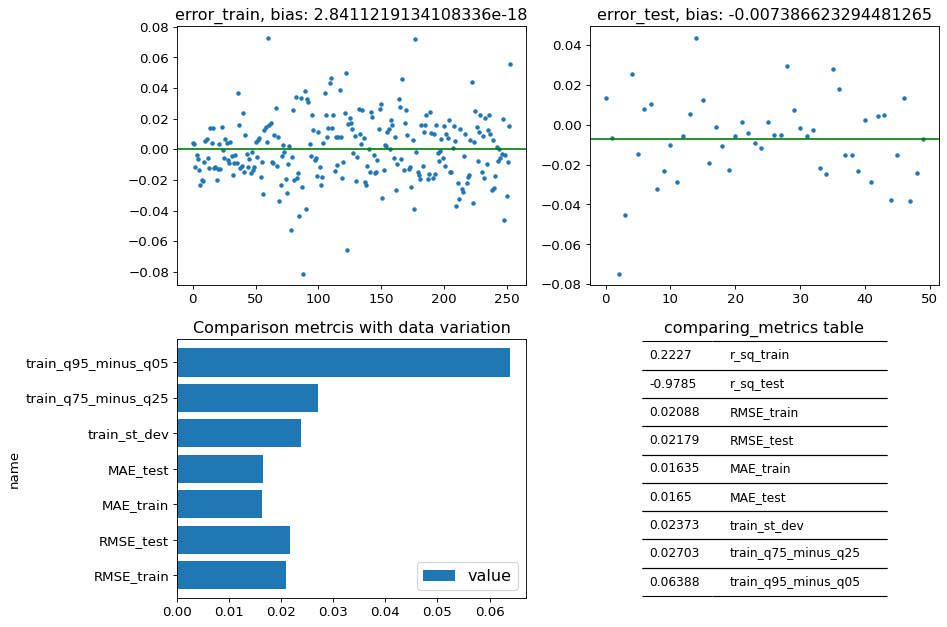

In [34]:
comparing_metrics = eval_model_predictions_regression_problem(
    y_train, train_pred, y_test, test_pred,
    need_plots=True
)

In [235]:
comparing_metrics

,name,value
0,r_sq_train,0.086698
1,r_sq_test,-0.117127
2,RMSE_train,0.018615
3,RMSE_test,0.021741
4,MAE_train,0.014893
5,MAE_test,0.017072
6,train_st_dev,0.019495
7,train_q75_minus_q25,0.025104
8,train_q95_minus_q05,0.058892


In [125]:
for row in range(len(comparing_metrics)):
    elem_to_append = comparing_metrics.iloc[row]
    print(elem_to_append[1])
    elem_to_append[1] = round(elem_to_append[1], 3+abs(math.floor((math.log10(elem_to_append[1])))))
    cell_text.append(elem_to_append)
cell_text

0.08669801129502597
-0.11712741651879433


c:\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


ValueError: math domain error

In [124]:
comparing_metrics.iloc[2]

name     rmse_train
value     0.0186147
Name: rmse_train, dtype: object

In [371]:
np.quantile(a=y_train, q=0.75)

0.01594732171894139

In [405]:
type(y_train[0]) == np.ndarray

True

In [132]:
import math
print(abs(math.floor((math.log10(abs(-0.11712741651879433))))))

round(-0.11712741651879433, 3+abs(math.floor((math.log10(abs(-0.11712741651879433))))))

1


-0.1171

# Linear Regression

In [431]:
import numpy as np
from sklearn.linear_model import LinearRegression

# X_train, X_test
# y_train, y_test

# Train model
model_lin_reg = LinearRegression().fit(X_train, y_train)

# Make prediction on train and test
train_pred = model_lin_reg.predict(X_train)
test_pred = model_lin_reg.predict(X_test)

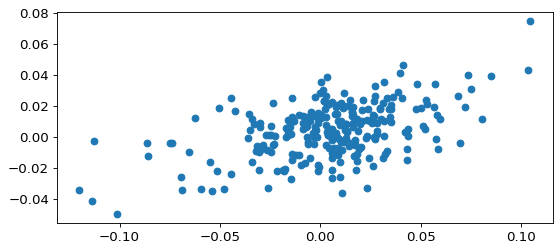

In [432]:
plt.scatter(y_train, train_pred)



c:\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

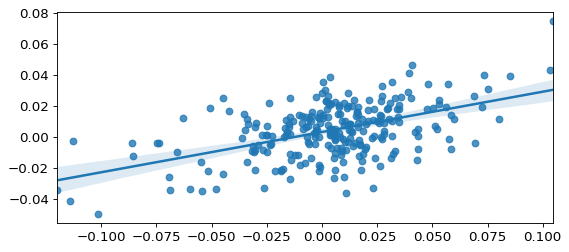

In [434]:
import seaborn as sns
sns.regplot(y_train, train_pred)

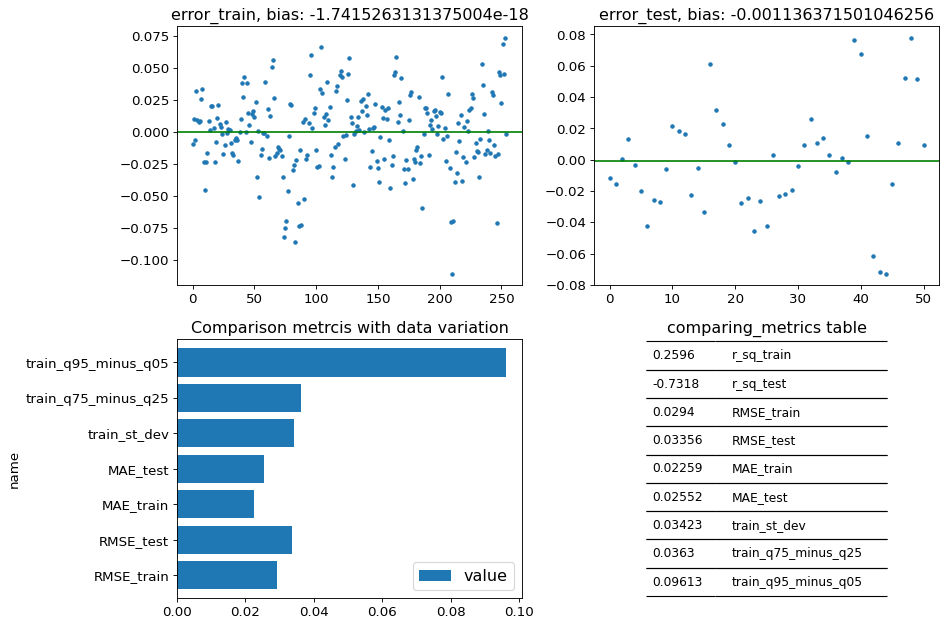

In [435]:
comparing_metrics = eval_model_predictions_regression_problem(
    y_train, train_pred, y_test, test_pred,
    need_plots=True
)

## Light GBM

In [447]:
import lightgbm as lightgbm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import classification_report

# categorical_features = [c for c, cols_x in enumerate(data_train_x.columns) if 'category' in cols_x]

train_data = lightgbm.Dataset(X_train, label=y_train.ravel(), categorical_feature='auto') # , categorical_feature=categorical_features
valid_data = lightgbm.Dataset(X_test, label=y_test.ravel())

params = {
    'is_unbalance': 'true',
    'boosting': 'gbdt',
    'num_leaves': 31, # default = 31, try 300 for overfitting
    'learning_rate': 0.0001, # default = 0.1
    'max_bin': 255, # default = 255
    'feature_fraction': 1.0,
    'bagging_fraction': 1.0, # bagging_freq should be set to a non zero value
    'bagging_freq': 0, # default = 0
    'verbose': 0
}
# params['boosting_type']='gbdt' #GradientBoostingDecisionTree
params['objective']='regression' #'multiclass', 'binary', 'regression'
params['metric']='l2' #multi_error, auc, binary_error, average_precision
# params['num_class']=2

print(str(datetime.now()))

model_lgbm = lightgbm.train(
    params,
    train_data,
    valid_sets=valid_data,
    num_boost_round=2000,
    early_stopping_rounds=200, 
    verbose_eval=False
)

print(str(datetime.now()))
print('best score: ', model_lgbm.best_score) 
print('best iteration: ', model_lgbm.best_iteration)

2021-03-16 14:20:02.517026
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002619 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

In [448]:
print('best score: ', model_lgbm.best_score) 
print('best iteration: ', model_lgbm.best_iteration)

best score:  defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('l2', 0.0034603260162329)])})
best iteration:  2000


In [449]:
train_pred = model_lgbm.predict(X_train)
test_pred = model_lgbm.predict(X_test)

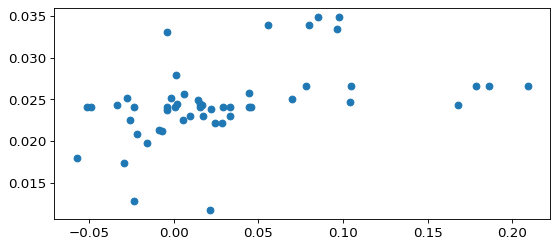

In [450]:
plt.scatter(y_test, model_lgbm.predict(X_test))

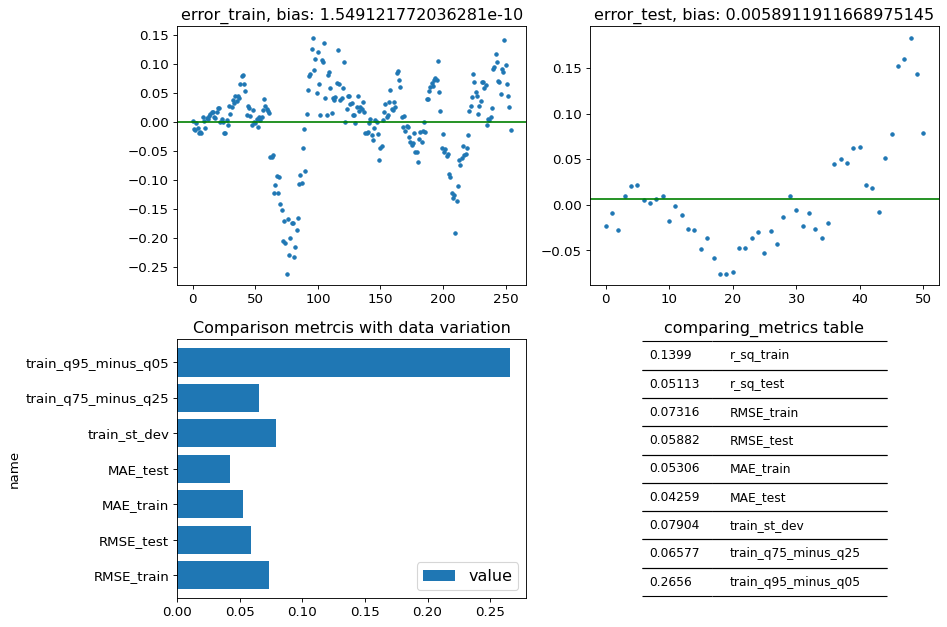

In [451]:
comparing_metrics = eval_model_predictions_regression_problem(
    [item for sublist in y_train for item in sublist], 
    train_pred, 
    [item for sublist in y_test for item in sublist], 
    test_pred,
    need_plots=True
)

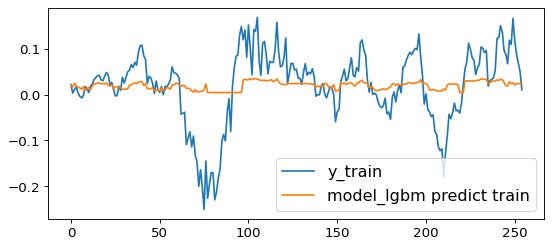

In [452]:
plt.plot(y_train, label='y_train')
plt.plot(model_lgbm.predict(X_train), label='model_lgbm predict train')
plt.legend()

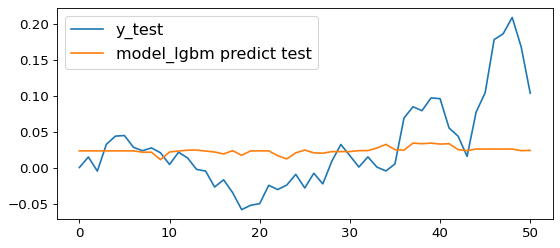

In [453]:
# plt.plot(list((model_lgbm.predict(X_test) - [item for sublist in y_test for item in sublist])))
plt.plot(y_test, label='y_test')
plt.plot(model_lgbm.predict(X_test), label='model_lgbm predict test')
plt.legend()

In [417]:
np.quantile(list(model_lgbm.predict(X_train)), 0.95)

0.01534354817748511

In [424]:
mask = list(model_lgbm.predict(X_test)) > np.quantile(list(model_lgbm.predict(X_train)), 0.95)
print(np.array([item for sublist in y_test for item in sublist])[mask].mean())
np.array([item for sublist in y_test for item in sublist])[mask]

0.008621629873042453


array([ 0.01533856,  0.01081007,  0.01598152,  0.03441849, -0.00538579,
        0.01770278,  0.02123647, -0.00576889, -0.02516779, -0.02717622,
       -0.0037168 , -0.00992224, -0.00670563, -0.01979467, -0.01287852,
       -0.0116575 ,  0.00116439, -0.00023061,  0.03124019,  0.01708685,
        0.00120519,  0.00218862, -0.0169801 ,  0.02792953,  0.03320594,
        0.01939195, -0.0208021 , -0.02813392, -0.01444522, -0.00564627,
        0.02130205,  0.08616805,  0.09060442,  0.06057261])

In [425]:
mask = list(model_lgbm.predict(X_test)) < np.quantile(list(model_lgbm.predict(X_train)), 0.3)
print(np.array([item for sublist in y_test for item in sublist])[mask].mean())
np.array([item for sublist in y_test for item in sublist])[mask]

-0.010383633260053008


array([-0.01405957, -0.00710336, -0.01055966, -0.00871462, -0.0143501 ,
       -0.00751448])

In [261]:
pd.DataFrame({'Value': model_lgbm.feature_importance(),'Feature': news_cols + price_change_cols}).sort_values(by='Value', ascending=False).reset_index()

,index,Value,Feature
0,25,8967,price_change_8
1,26,8159,price_change_9
2,46,8043,price_change_29
3,0,5876,my_label_Analyst_Rating
4,40,5514,price_change_23
5,11,5145,my_label_Price_Target
6,28,5106,price_change_11
7,21,4237,price_change_4
8,45,4186,price_change_28
9,36,3920,price_change_19


## Функция для перебора параметров

## LSTM

In [180]:
import math
import torch
import torch.nn as nn

In [181]:
class NaiveCustomLSTM(nn.Module):
    def __init__(self, input_sz: int, hidden_sz: int):
        super().__init__()
        self.input_size = input_sz
        self.hidden_size = hidden_sz
        
        #i_t
        self.U_i = nn.Parameter(torch.Tensor(input_sz, hidden_sz))
        self.V_i = nn.Parameter(torch.Tensor(hidden_sz, hidden_sz))
        self.b_i = nn.Parameter(torch.Tensor(hidden_sz))
        
        #f_t
        self.U_f = nn.Parameter(torch.Tensor(input_sz, hidden_sz))
        self.V_f = nn.Parameter(torch.Tensor(hidden_sz, hidden_sz))
        self.b_f = nn.Parameter(torch.Tensor(hidden_sz))
        
        #c_t
        self.U_c = nn.Parameter(torch.Tensor(input_sz, hidden_sz))
        self.V_c = nn.Parameter(torch.Tensor(hidden_sz, hidden_sz))
        self.b_c = nn.Parameter(torch.Tensor(hidden_sz))
        
        #o_t
        self.U_o = nn.Parameter(torch.Tensor(input_sz, hidden_sz))
        self.V_o = nn.Parameter(torch.Tensor(hidden_sz, hidden_sz))
        self.b_o = nn.Parameter(torch.Tensor(hidden_sz))
        
        self.init_weights()

In [182]:
def init_weights(self):
        stdv = 1.0 / math.sqrt(self.hidden_size)
        for weight in self.parameters():
            weight.data.uniform_(-stdv, stdv)

In [183]:
def forward(self,
                x,
                init_states=None):
        
        """
        assumes x.shape represents (batch_size, sequence_size, input_size)
        """
        bs, seq_sz, _ = x.size()
        hidden_seq = []
        
        if init_states is None:
            h_t, c_t = (
                torch.zeros(bs, self.hidden_size).to(x.device),
                torch.zeros(bs, self.hidden_size).to(x.device),
            )
        else:
            h_t, c_t = init_states
            
        for t in range(seq_sz):
            x_t = x[:, t, :]
            
            i_t = torch.sigmoid(x_t @ self.U_i + h_t @ self.V_i + self.b_i)
            f_t = torch.sigmoid(x_t @ self.U_f + h_t @ self.V_f + self.b_f)
            g_t = torch.tanh(x_t @ self.U_c + h_t @ self.V_c + self.b_c)
            o_t = torch.sigmoid(x_t @ self.U_o + h_t @ self.V_o + self.b_o)
            c_t = f_t * c_t + i_t * g_t
            h_t = o_t * torch.tanh(c_t)
            
            hidden_seq.append(h_t.unsqueeze(0))
        
        #reshape hidden_seq p/ retornar
        hidden_seq = torch.cat(hidden_seq, dim=0)
        hidden_seq = hidden_seq.transpose(0, 1).contiguous()
        return hidden_seq, (h_t, c_t)

In [184]:
class CustomLSTM(nn.Module):
    def __init__(self, input_sz, hidden_sz):
        super().__init__()
        self.input_sz = input_sz
        self.hidden_size = hidden_sz
        self.W = nn.Parameter(torch.Tensor(input_sz, hidden_sz * 4))
        self.U = nn.Parameter(torch.Tensor(hidden_sz, hidden_sz * 4))
        self.bias = nn.Parameter(torch.Tensor(hidden_sz * 4))
        self.init_weights()
                
    def init_weights(self):
        stdv = 1.0 / math.sqrt(self.hidden_size)
        for weight in self.parameters():
            weight.data.uniform_(-stdv, stdv)
         
    def forward(self, x, 
                init_states=None):
        """Assumes x is of shape (batch, sequence, feature)"""
        bs, seq_sz, _ = x.size()
        hidden_seq = []
        if init_states is None:
            h_t, c_t = (torch.zeros(bs, self.hidden_size).to(x.device), 
                        torch.zeros(bs, self.hidden_size).to(x.device))
        else:
            h_t, c_t = init_states
         
        HS = self.hidden_size
        for t in range(seq_sz):
            x_t = x[:, t, :]
            # batch the computations into a single matrix multiplication
            gates = x_t @ self.W + h_t @ self.U + self.bias
            i_t, f_t, g_t, o_t = (
                torch.sigmoid(gates[:, :HS]), # input
                torch.sigmoid(gates[:, HS:HS*2]), # forget
                torch.tanh(gates[:, HS*2:HS*3]),
                torch.sigmoid(gates[:, HS*3:]), # output
            )
            c_t = f_t * c_t + i_t * g_t
            h_t = o_t * torch.tanh(c_t)
            hidden_seq.append(h_t.unsqueeze(0))
        hidden_seq = torch.cat(hidden_seq, dim=0)
        # reshape from shape (sequence, batch, feature) to (batch, sequence, feature)
        hidden_seq = hidden_seq.transpose(0, 1).contiguous()
        return hidden_seq, (h_t, c_t)

In [185]:
class CustomLSTM(nn.Module):
    def __init__(self, input_sz, hidden_sz, peephole=False):
        super().__init__()
        self.input_sz = input_sz
        self.hidden_size = hidden_sz
        self.peephole = peephole
        self.W = nn.Parameter(torch.Tensor(input_sz, hidden_sz * 4))
        self.U = nn.Parameter(torch.Tensor(hidden_sz, hidden_sz * 4))
        self.bias = nn.Parameter(torch.Tensor(hidden_sz * 4))
        self.init_weights()
                
    def init_weights(self):
        stdv = 1.0 / math.sqrt(self.hidden_size)
        for weight in self.parameters():
            weight.data.uniform_(-stdv, stdv)
         
    def forward(self, x, 
                init_states=None):
        """Assumes x is of shape (batch, sequence, feature)"""
        bs, seq_sz, _ = x.size()
        hidden_seq = []
        if init_states is None:
            h_t, c_t = (torch.zeros(bs, self.hidden_size).to(x.device), 
                        torch.zeros(bs, self.hidden_size).to(x.device))
        else:
            h_t, c_t = init_states
         
        HS = self.hidden_size
        for t in range(seq_sz):
            x_t = x[:, t, :]
            # batch the computations into a single matrix multiplication
            
            if self.peephole:
                gates = x_t @ U + c_t @ V + bias
            else:
                gates = x_t @ U + h_t @ V + bias
                g_t = torch.tanh(gates[:, HS*2:HS*3])
            
            i_t, f_t, o_t = (
                torch.sigmoid(gates[:, :HS]), # input
                torch.sigmoid(gates[:, HS:HS*2]), # forget
                torch.sigmoid(gates[:, HS*3:]), # output
            )
            
            if self.peephole:
                c_t = f_t * c_t + i_t * torch.sigmoid(x_t @ U + bias)[:, HS*2:HS*3]
                h_t = torch.tanh(o_t * c_t)
            else:
                c_t = f_t * c_t + i_t * g_t
                h_t = o_t * torch.tanh(c_t)
                
            hidden_seq.append(h_t.unsqueeze(0))
            
        hidden_seq = torch.cat(hidden_seq, dim=0)
        # reshape from shape (sequence, batch, feature) to (batch, sequence, feature)
        hidden_seq = hidden_seq.transpose(0, 1).contiguous()
        
        return hidden_seq, (h_t, c_t)

In [186]:
ds_train = torch.utils.data.TensorDataset(X_train, y_train)
train_loader = torch.utils.data.DataLoader(ds_train, batch_size=128, shuffle=True)

ds_test = torch.utils.data.TensorDataset(X_test, y_test)
test_loader = torch.utils.data.DataLoader(ds_test, batch_size=256, shuffle=True)

TypeError: 'int' object is not callable